# TicTacToe
En esta notebook se estudian distintas combinaciones de enfrentamiento entre agente del tipo MinMax, agente del tipo MonteCarlo Tree Search y agente randomico.
Se propone evaluar el comportamiento de cada tipo de agente a traves de un "torneos", es decir, se proponen distintas configuraciones para encontrar los de mejor rendimiento.

## Instalacion de libreriaas y dependencias

In [1]:
import sys
import os

sys.path.append(os.path.abspath('../..'))


In [2]:
from games.tictactoe.tictactoe import TicTacToe
from agents.mcts_t_V2 import MonteCarloTreeSearch
from agents.minimax import MiniMax
from agents.agent_random import RandomAgent
from torneo_TicTacToe import AgentEvaluator
import numpy as np
from collections import defaultdict

In [3]:
game = TicTacToe(render_mode='')

## MinMax

In [ ]:
# Configurar agentes
agents_dict_MinMAx = {
    'MinMax_d1': MiniMax(game=game, agent='X', depth=1),
    'MinMax_d2': MiniMax(game=game, agent='X', depth=2),
    'MinMax_d3': MiniMax(game=game, agent='X', depth=3),
    'MinMax_d4': MiniMax(game=game, agent='X', depth=4),
    'MinMax_d5': MiniMax(game=game, agent='X', depth=5),
    'MinMax_d6': MiniMax(game=game, agent='X', depth=6)
}


In [ ]:
# Ejecutar evaluación
evaluator = AgentEvaluator(TicTacToe)
evaluator.run_tournament(agents_dict_MinMAx, num_games=20)
df, performance, matrix = evaluator.generate_report()

Ejecutando torneo con 15 enfrentamientos
20 partidas por enfrentamiento

Enfrentamiento 1/15: MinMax_d1 vs MinMax_d2

Enfrentamiento 2/15: MinMax_d1 vs MinMax_d3

Enfrentamiento 3/15: MinMax_d1 vs MinMax_d4

Enfrentamiento 4/15: MinMax_d1 vs MinMax_d5

Enfrentamiento 5/15: MinMax_d1 vs MinMax_d6

Enfrentamiento 6/15: MinMax_d2 vs MinMax_d3

Enfrentamiento 7/15: MinMax_d2 vs MinMax_d4

Enfrentamiento 8/15: MinMax_d2 vs MinMax_d5

Enfrentamiento 9/15: MinMax_d2 vs MinMax_d6

Enfrentamiento 10/15: MinMax_d3 vs MinMax_d4

Enfrentamiento 11/15: MinMax_d3 vs MinMax_d5

Enfrentamiento 12/15: MinMax_d3 vs MinMax_d6

Enfrentamiento 13/15: MinMax_d4 vs MinMax_d5

Enfrentamiento 14/15: MinMax_d4 vs MinMax_d6

Enfrentamiento 15/15: MinMax_d5 vs MinMax_d6
=== REPORTE DE EVALUACIÓN DE AGENTES ===

1. RANKING GENERAL (por win rate promedio):
           win_rate  total_games  avg_decision_time  avg_game_length
agent                                                               
MinMax_d6      0.34    

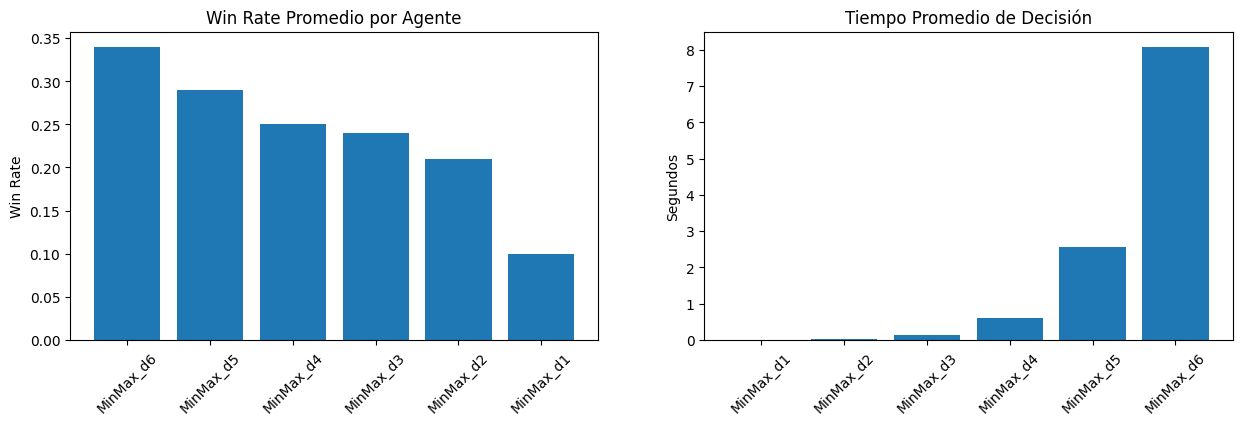

In [ ]:
evaluator.plot_results(df)

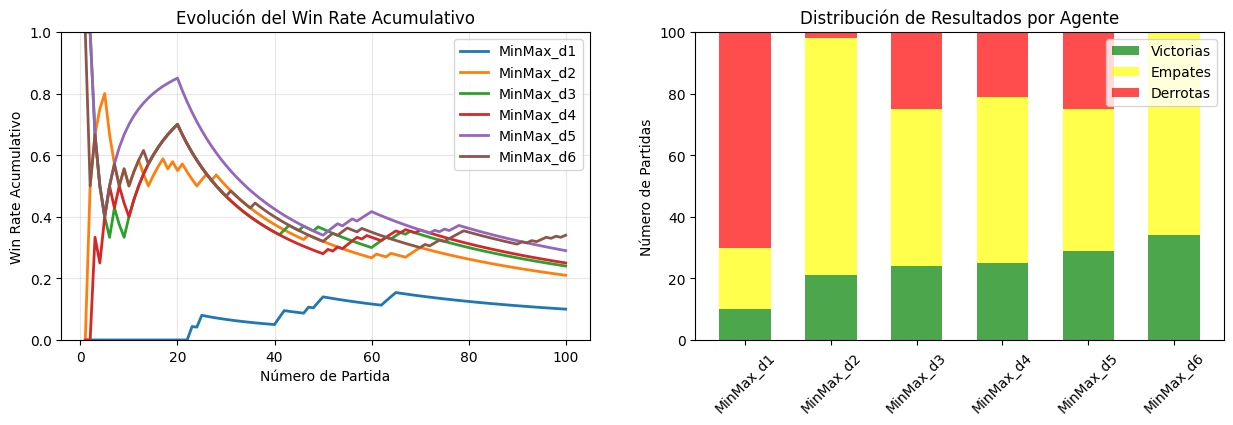

In [ ]:
evaluator.plot_detailed_evolution()

Si bien, el de mejores resultados fue MinMax depth=6, se obtienen muy buenos resultados con un depth=4, y en un tiempo mucho menor. Por lo que esta profundidad es la escogida para competir con MCTS y RandomAgent.

## MonteCarlo Tree Search

In [12]:
agents_dict_MCTS = {
    'MCTS_1': MonteCarloTreeSearch(game=game, agent='X', simulations=50, rollouts=10),
    'MCTS_2': MonteCarloTreeSearch(game=game, agent='X', simulations=50, rollouts=20),
    'MCTS_3': MonteCarloTreeSearch(game=game, agent='X', simulations=50, rollouts=30),
    'MCTS_4': MonteCarloTreeSearch(game=game, agent='X', simulations=100, rollouts=10),
    'MCTS_5': MonteCarloTreeSearch(game=game, agent='X', simulations=100, rollouts=20),
    'MCTS_6': MonteCarloTreeSearch(game=game, agent='X', simulations=100, rollouts=30)

}

In [13]:
# Ejecutar evaluación
evaluator_MCTS = AgentEvaluator(TicTacToe)
evaluator_MCTS.run_tournament(agents_dict_MCTS, num_games=20)
df_MCTS, performance_MCTS, matrix_MCTS = evaluator_MCTS.generate_report()

Ejecutando torneo con 15 enfrentamientos
20 partidas por enfrentamiento

Enfrentamiento 1/15: MCTS_1 vs MCTS_2

Enfrentamiento 2/15: MCTS_1 vs MCTS_3

Enfrentamiento 3/15: MCTS_1 vs MCTS_4

Enfrentamiento 4/15: MCTS_1 vs MCTS_5

Enfrentamiento 5/15: MCTS_1 vs MCTS_6

Enfrentamiento 6/15: MCTS_2 vs MCTS_3

Enfrentamiento 7/15: MCTS_2 vs MCTS_4

Enfrentamiento 8/15: MCTS_2 vs MCTS_5

Enfrentamiento 9/15: MCTS_2 vs MCTS_6

Enfrentamiento 10/15: MCTS_3 vs MCTS_4

Enfrentamiento 11/15: MCTS_3 vs MCTS_5

Enfrentamiento 12/15: MCTS_3 vs MCTS_6

Enfrentamiento 13/15: MCTS_4 vs MCTS_5

Enfrentamiento 14/15: MCTS_4 vs MCTS_6

Enfrentamiento 15/15: MCTS_5 vs MCTS_6
=== REPORTE DE EVALUACIÓN DE AGENTES ===

1. RANKING GENERAL (por win rate promedio):
        win_rate  total_games  avg_decision_time  avg_game_length
agent                                                            
MCTS_6      0.49          100              3.713             6.47
MCTS_3      0.45          100              2.007     

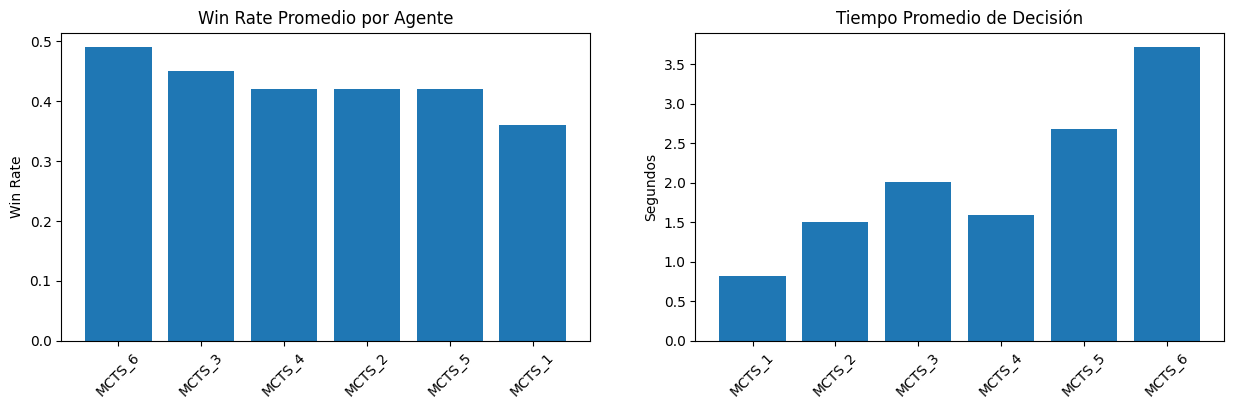

In [14]:
evaluator_MCTS.plot_results(df_MCTS)

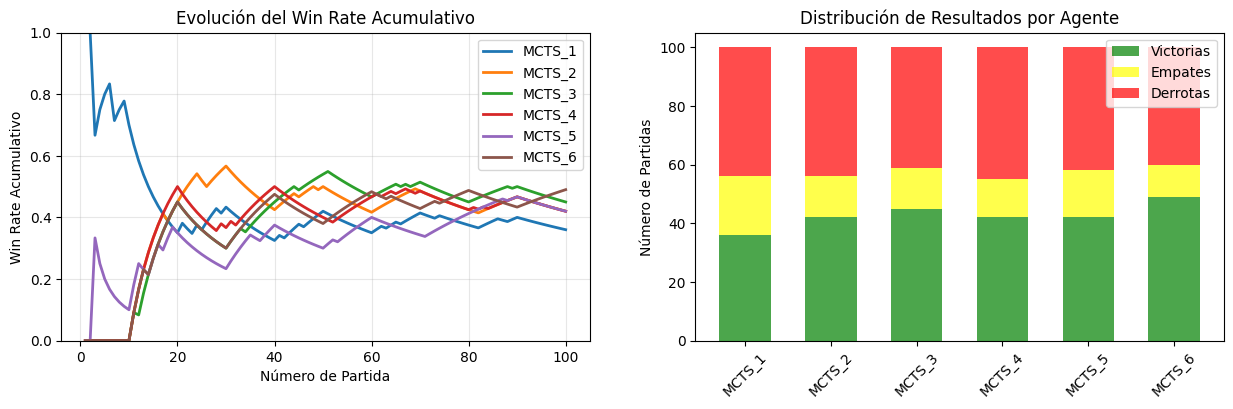

In [16]:
evaluator_MCTS.plot_detailed_evolution()

## MonteCarlo Tree Search, MinMax y Random

In [17]:
agents_dict_final = {
    'MCTS_2': MonteCarloTreeSearch(game=game, agent='X', simulations=50, rollouts=20),
    'MinMax_d4': MiniMax(game=game, agent='X', depth=4),
    'Random': RandomAgent(game=game, agent='X')
}

In [18]:
# Ejecutar evaluación
evaluator_Final = AgentEvaluator(TicTacToe)
evaluator_Final.run_tournament(agents_dict_final, num_games=20)
df_Final, performance_Final, matrix_Final = evaluator_Final.generate_report()

Ejecutando torneo con 3 enfrentamientos
20 partidas por enfrentamiento

Enfrentamiento 1/3: MCTS_2 vs MinMax_d4

Enfrentamiento 2/3: MCTS_2 vs Random

Enfrentamiento 3/3: MinMax_d4 vs Random
=== REPORTE DE EVALUACIÓN DE AGENTES ===

1. RANKING GENERAL (por win rate promedio):
           win_rate  total_games  avg_decision_time  avg_game_length
agent                                                               
MCTS_2        0.525           40              1.651            7.025
MinMax_d4     0.450           40              1.324            7.625
Random        0.025           40              0.000            6.650

2. MATRIZ DE WIN RATES:
           MCTS_2  MinMax_d4  Random
MCTS_2       0.00       0.10    0.95
MinMax_d4    0.15       0.00    0.75
Random       0.00       0.05    0.00

3. ESTADÍSTICAS DETALLADAS:

MCTS_2:
  Win rate promedio: 0.525
  Mejor enfrentamiento: vs Random (0.950)
  Peor enfrentamiento: vs MinMax_d4 (0.100)
  Tiempo promedio por movimiento: 1.6509s

MinMax_d4:


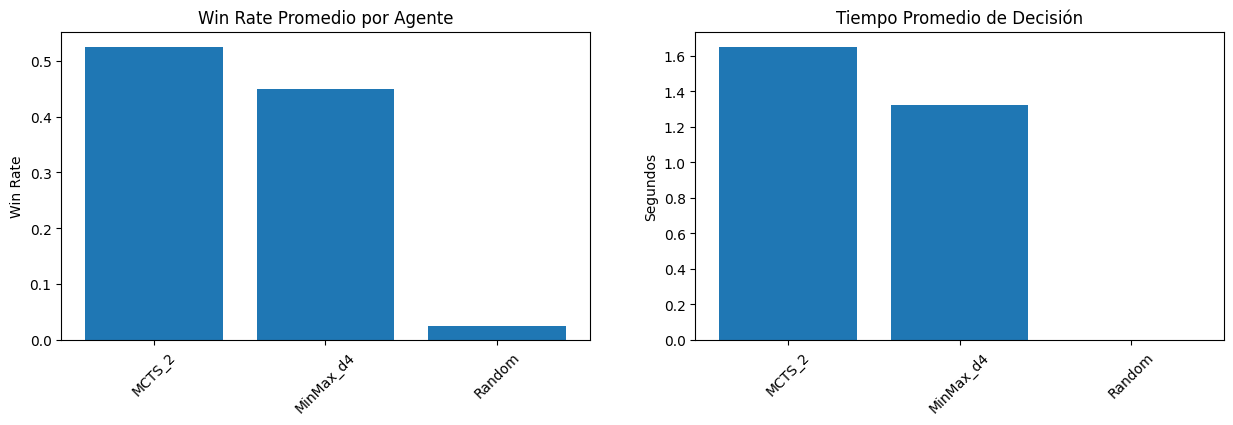

In [19]:
evaluator_Final.plot_results(df_Final)

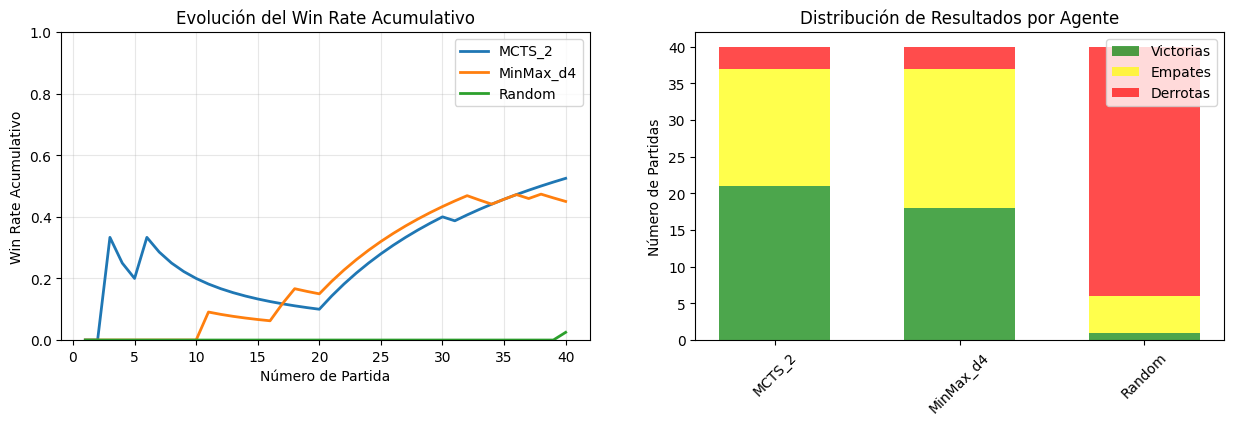

In [20]:
evaluator_Final.plot_detailed_evolution()

### MCTS vs MinMAx

In [23]:
agents_dict_MCTS_vs_MinMAx = {
    'MCTS_2': MonteCarloTreeSearch(game=game, agent='X', simulations=50, rollouts=20),
    'MinMax_d4': MiniMax(game=game, agent='X', depth=4),
}

In [24]:
# Ejecutar evaluación
evaluator_MCTS_vs_MinMAx = AgentEvaluator(TicTacToe)
evaluator_MCTS_vs_MinMAx.run_tournament(agents_dict_MCTS_vs_MinMAx, num_games=100)
df_MCTS_vs_MinMAx, performance_MCTS_vs_MinMAx, matrix_MCTS_vs_MinMAx = evaluator_MCTS_vs_MinMAx.generate_report()

Ejecutando torneo con 1 enfrentamientos
100 partidas por enfrentamiento

Enfrentamiento 1/1: MCTS_2 vs MinMax_d4
  Progreso: 50/50
  Progreso: 50/50
=== REPORTE DE EVALUACIÓN DE AGENTES ===

1. RANKING GENERAL (por win rate promedio):
           win_rate  total_games  avg_decision_time  avg_game_length
agent                                                               
MCTS_2         0.23          100              1.648             7.62
MinMax_d4      0.17          100              1.281             7.62

2. MATRIZ DE WIN RATES:
           MCTS_2  MinMax_d4
MCTS_2       0.00       0.23
MinMax_d4    0.17       0.00

3. ESTADÍSTICAS DETALLADAS:

MCTS_2:
  Win rate promedio: 0.230
  Mejor enfrentamiento: vs MinMax_d4 (0.230)
  Peor enfrentamiento: vs MinMax_d4 (0.230)
  Tiempo promedio por movimiento: 1.6477s

MinMax_d4:
  Win rate promedio: 0.170
  Mejor enfrentamiento: vs MCTS_2 (0.170)
  Peor enfrentamiento: vs MCTS_2 (0.170)
  Tiempo promedio por movimiento: 1.2806s


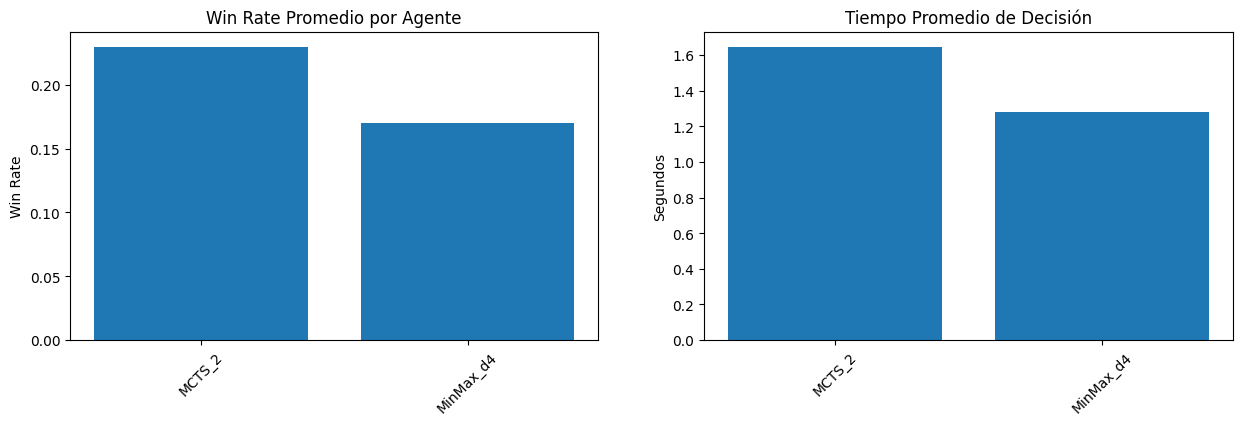

In [25]:
evaluator_MCTS_vs_MinMAx.plot_results(df_MCTS_vs_MinMAx)

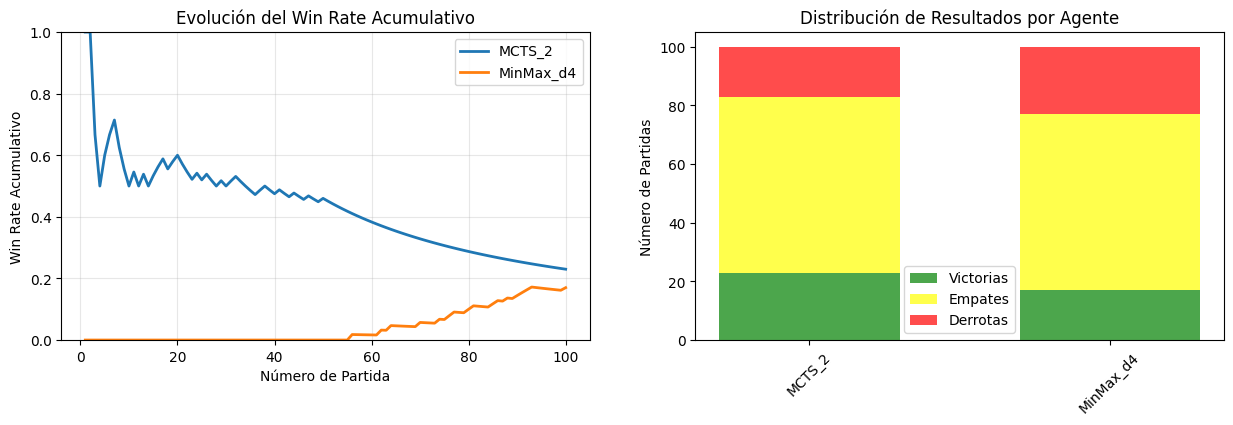

In [26]:
evaluator_MCTS_vs_MinMAx.plot_detailed_evolution()

### MCTS vs Random

In [27]:
agents_dict_MCTS_vs_Random = {
    'MCTS_2': MonteCarloTreeSearch(game=game, agent='X', simulations=50, rollouts=20),
    'Random': RandomAgent(game=game, agent='X')
}

In [28]:
# Ejecutar evaluación
evaluator_MCTS_vs_Random = AgentEvaluator(TicTacToe)
evaluator_MCTS_vs_Random.run_tournament(agents_dict_MCTS_vs_Random, num_games=100)
df_MCTS_vs_Random, performance_MCTS_vs_Random, matrix_MCTS_vs_Random = evaluator_MCTS_vs_Random.generate_report()

Ejecutando torneo con 1 enfrentamientos
100 partidas por enfrentamiento

Enfrentamiento 1/1: MCTS_2 vs Random
  Progreso: 50/50
  Progreso: 50/50
=== REPORTE DE EVALUACIÓN DE AGENTES ===

1. RANKING GENERAL (por win rate promedio):
        win_rate  total_games  avg_decision_time  avg_game_length
agent                                                            
MCTS_2      0.93          100              1.532              6.1
Random      0.03          100              0.000              6.1

2. MATRIZ DE WIN RATES:
        MCTS_2  Random
MCTS_2    0.00    0.93
Random    0.03    0.00

3. ESTADÍSTICAS DETALLADAS:

MCTS_2:
  Win rate promedio: 0.930
  Mejor enfrentamiento: vs Random (0.930)
  Peor enfrentamiento: vs Random (0.930)
  Tiempo promedio por movimiento: 1.5320s

Random:
  Win rate promedio: 0.030
  Mejor enfrentamiento: vs MCTS_2 (0.030)
  Peor enfrentamiento: vs MCTS_2 (0.030)
  Tiempo promedio por movimiento: 0.0001s


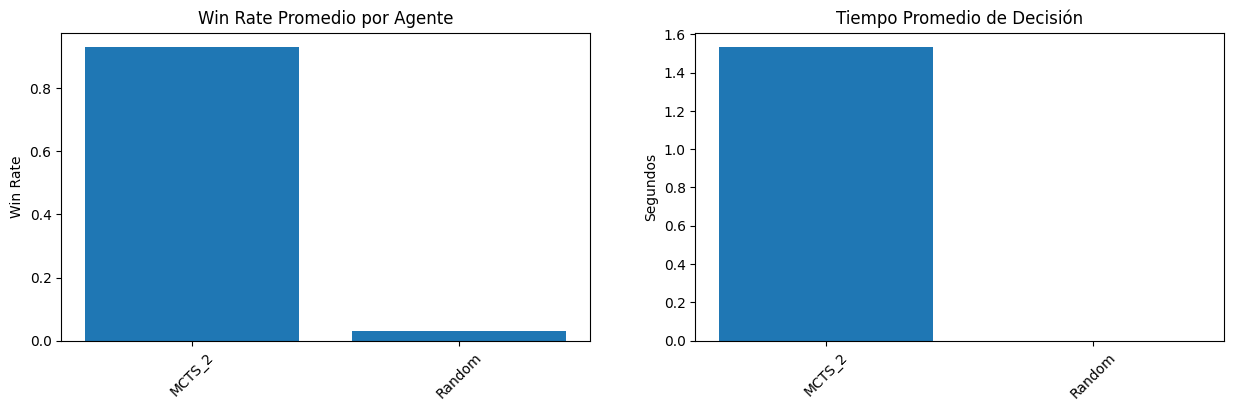

In [29]:
evaluator_MCTS_vs_Random.plot_results(df_MCTS_vs_Random)

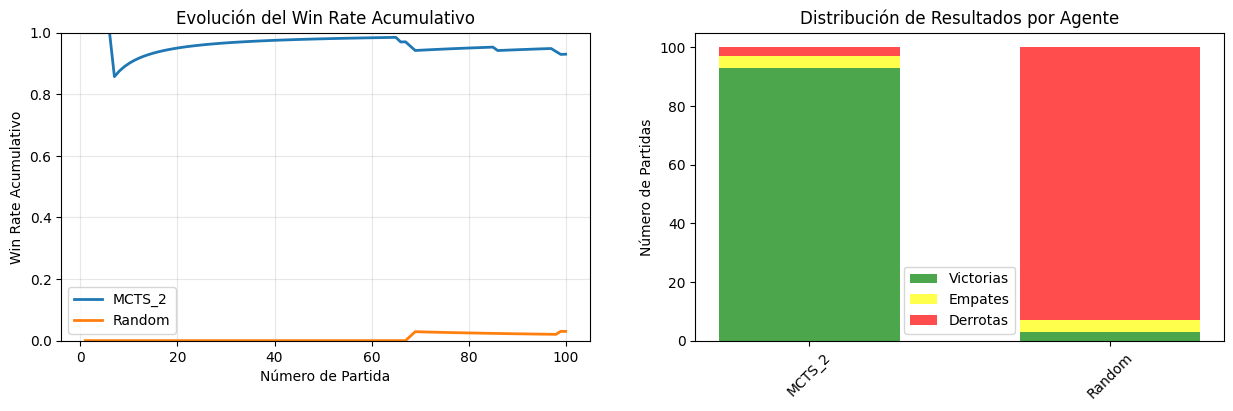

In [30]:
evaluator_MCTS_vs_Random.plot_detailed_evolution()

### MinMax vs Random

In [ ]:
agents_dict_Random_vs_MinMAx = {
    'Random': RandomAgent(game=game, agent='X'),
    'MinMax_d4': MiniMax(game=game, agent='X', depth=4),
}

In [ ]:
# Ejecutar evaluación
evaluator_Random_vs_MinMAx = AgentEvaluator(TicTacToe)
evaluator_Random_vs_MinMAx.run_tournament(agents_dict_Random_vs_MinMAx, num_games=100)
df_Random_vs_MinMAx, performance_Random_vs_MinMAx, matrix_Random_vs_MinMAx = evaluator_Random_vs_MinMAx.generate_report()

Ejecutando torneo con 1 enfrentamientos
100 partidas por enfrentamiento

Enfrentamiento 1/1: Random vs MinMax_d4
  Progreso: 50/50
  Progreso: 50/50
=== REPORTE DE EVALUACIÓN DE AGENTES ===

1. RANKING GENERAL (por win rate promedio):
           win_rate  total_games  avg_decision_time  avg_game_length
agent                                                               
MinMax_d4      0.88          100              1.036             6.54
Random         0.03          100              0.000             6.54

2. MATRIZ DE WIN RATES:
           Random  MinMax_d4
Random       0.00       0.03
MinMax_d4    0.88       0.00

3. ESTADÍSTICAS DETALLADAS:

Random:
  Win rate promedio: 0.030
  Mejor enfrentamiento: vs MinMax_d4 (0.030)
  Peor enfrentamiento: vs MinMax_d4 (0.030)
  Tiempo promedio por movimiento: 0.0001s

MinMax_d4:
  Win rate promedio: 0.880
  Mejor enfrentamiento: vs Random (0.880)
  Peor enfrentamiento: vs Random (0.880)
  Tiempo promedio por movimiento: 1.0364s


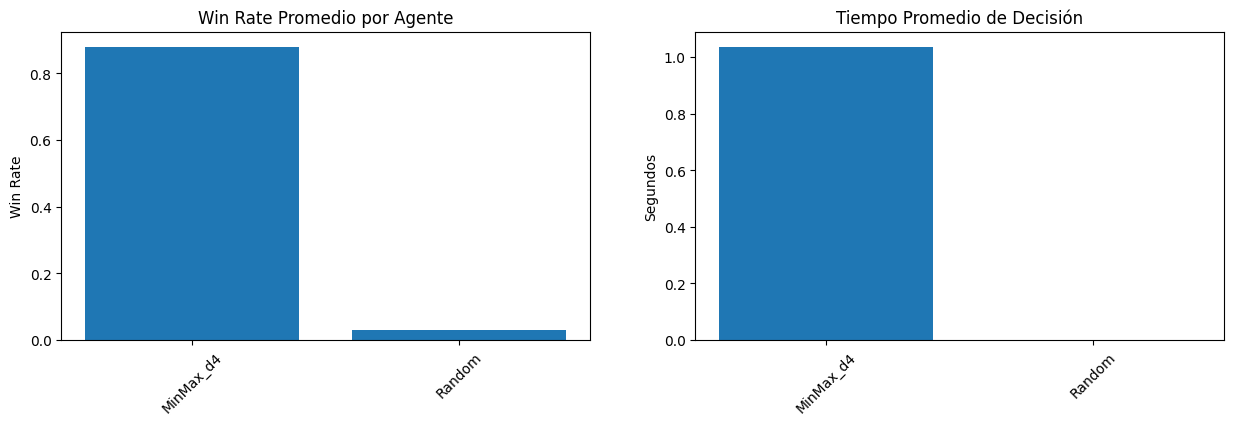

In [ ]:
evaluator_Random_vs_MinMAx.plot_results(df_Random_vs_MinMAx)

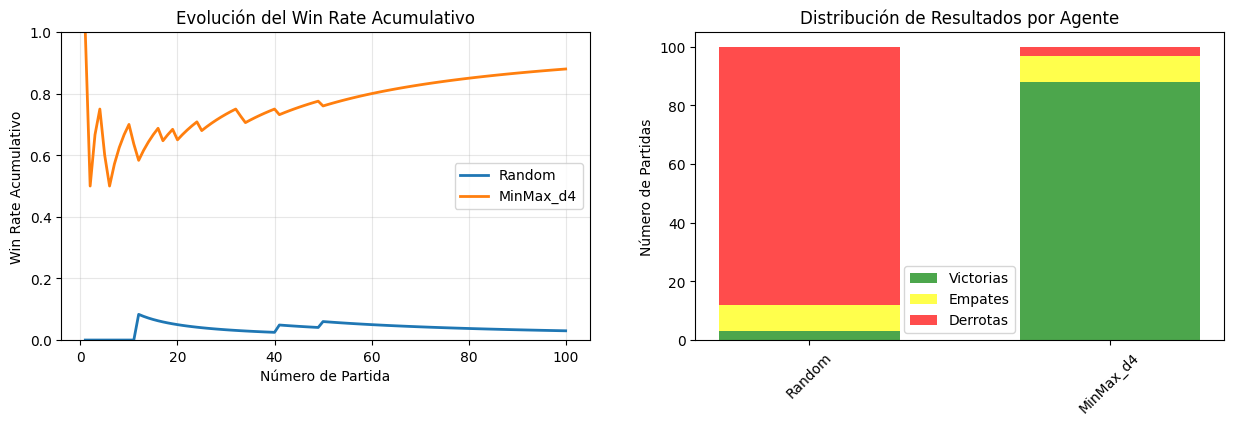

In [ ]:
evaluator_Random_vs_MinMAx.plot_detailed_evolution()